<div class="alert alert-block alert-danger">
Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` and that you delete any **raise NotImplementedError()** once you have filled in your code. Enter your student identifier below:

Start by filling in your Name and student ID below. **DO IT NOW**. Save this Jupyter Notebook with the name *MTH786P_surname_ID.ipynb*, where instead of *surname* and *ID* you write your surname and your student ID number.
    
Use the available cells to introduce the code. You can add additional cells if needed.
</div>

<div class="alert alert-block alert-warning">
STUDENT NAME = ""
    
STUDENT ID = ""
</div>

## Fashion MNIST free-style

This completes the first part of the assessment. From now on, you can use all concepts that you have learned throughout this module in order to obtain a classifier that can determine which fashion item is seen in a $28 \times 28$ pixel picture. While you are allowed to use different libraries for visualisation purposes, you can only use NumPy to program your classifier; tools from libraries such as SciPy are not allowed. Please note that your classfier will be tested and compared with classifiers from other students. Experimenting with differnt model approaches, regularisation models & parameters and hyperparameter-tuning strategies such cross validation is therefore highly recommended.

Some of the methods you may wish to try in an attempt to increase the classification accuracy are:
- One versus all algorithm
- Multilevel convolutional neural networks
- Support Vector Machines

In [49]:

from keras.models import Sequential
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K

Import any additional packages with the following cell.

In [50]:
class CNN:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model along with the input shape
    # to be "channels last" and the channels dimension itself
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    # if we are using "channels first", update the input shape
    # and channels dimension
    if K.image_data_format() == "channels_first":
      inputShape = (height, width, depth)
      chanDim = 1
      
    # 1st CONV -> RELU -> CONV -> RELU -> POOL layer set
    model.add(Conv2D(32, (3,3), padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    # 2nd CONV -> RELU -> CONV -> RELU -> POOL layer set
    model.add(Conv2D(64, (3,3), padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    # 1st (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    # return the constructed network architecture
    return model

In [51]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# images, labels = fashion_mnist.load_data()

In [52]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [53]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg") #The "Agg"  backend is used for Matplotlib so that we can save our training plot to disk.

from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from imutils import build_montages
import numpy as np
import cv2

In [54]:
# Initialize EPOCHS, LR_RATE, BATCH_SIZE
NUM_EPOCHS = 50
INIT_LR = 1e-2
BATCH_SIZE = 32

In [55]:
if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape((X_train.shape[0], 1 , 28, 28))
  X_test = X_test.reshape((X_test.shape[0], 1 , 28, 28))  
else:
  ## Otherwise use "channels_last"
  X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
  X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) 

In [56]:
# Scale data to the frame of [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [57]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

We begin by loading the Fashion MNIST training set that is taken from this [source](https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion):

In [58]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

Use the following space to write your codes. It should be possible to reproduce results that are shown in your report with the codes that are described here. You can outsource functions into separate files if you find that this tidies up your notebook. Any additional libraries that you want to use (e.g. for visualisations etc.) can be loaded here.

In [59]:
print("Compiling Model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = CNN.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
                                   metrics=['accuracy'])

Compiling Model...


/home/kai/.local/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
# Train The model
print("Training model...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

Training model...
Epoch 1/50
1875/1875 [==============================] - 99s 52ms/step - loss: 0.4634 - accuracy: 0.8395 - val_loss: 0.2922 - val_accuracy: 0.8943
Epoch 2/50
1875/1875 [==============================] - 97s 52ms/step - loss: 0.3049 - accuracy: 0.8912 - val_loss: 0.2758 - val_accuracy: 0.9021
Epoch 3/50
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2633 - accuracy: 0.9049 - val_loss: 0.2484 - val_accuracy: 0.9110
Epoch 4/50
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2392 - accuracy: 0.9125 - val_loss: 0.2249 - val_accuracy: 0.9194
Epoch 5/50
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2210 - accuracy: 0.9192 - val_loss: 0.2117 - val_accuracy: 0.9240
Epoch 6/50
1875/1875 [==============================] - 100s 54ms/step - loss: 0.2074 - accuracy: 0.9244 - val_loss: 0.2079 - val_accuracy: 0.9234
Epoch 7/50
1875/1875 [==============================] - 112s 60ms/step - loss: 0.1954 - accuracy: 0.9287 

In [60]:
from keras.models import load_model 
model.save('fashion_mnist_cnn_model.h5') # creates a HDF5 file 'my_model.h5' 

# Final evaluation of the model
scores = model.evaluate(X_train, y_train, verbose=1)
print("Train Score: %.2f%%" % (scores[0]*100))
print("Train Accuracy: %.2f%%" % (scores[1]*100))

############## Final evaluation of the model For Test Set
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))

1875/1875 [==============================] - 19s 10ms/step - loss: 2.3012 - accuracy: 0.1151
Train Score: 230.12%
Train Accuracy: 11.51%
313/313 [==============================] - 3s 11ms/step - loss: 2.3013 - accuracy: 0.1155
Test Score: 230.13%
Test Accuracy: 11.55%


In [61]:
# make predictions
preds = model.predict(X_test)

In [62]:
print("Evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
     target_names=labelNames))

Evaluating network...
              precision    recall  f1-score   support

         top       0.10      0.01      0.02      1000
     trouser       0.01      0.01      0.01      1000
    pullover       0.11      0.99      0.21      1000
       dress       0.59      0.03      0.05      1000
        coat       0.00      0.00      0.00      1000
      sandal       0.47      0.12      0.19      1000
       shirt       0.00      0.00      0.00      1000
     sneaker       0.00      0.00      0.00      1000
         bag       0.00      0.00      0.00      1000
  ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.13      0.12      0.05     10000
weighted avg       0.13      0.12      0.05     10000



/home/kai/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kai/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kai/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:

### List all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


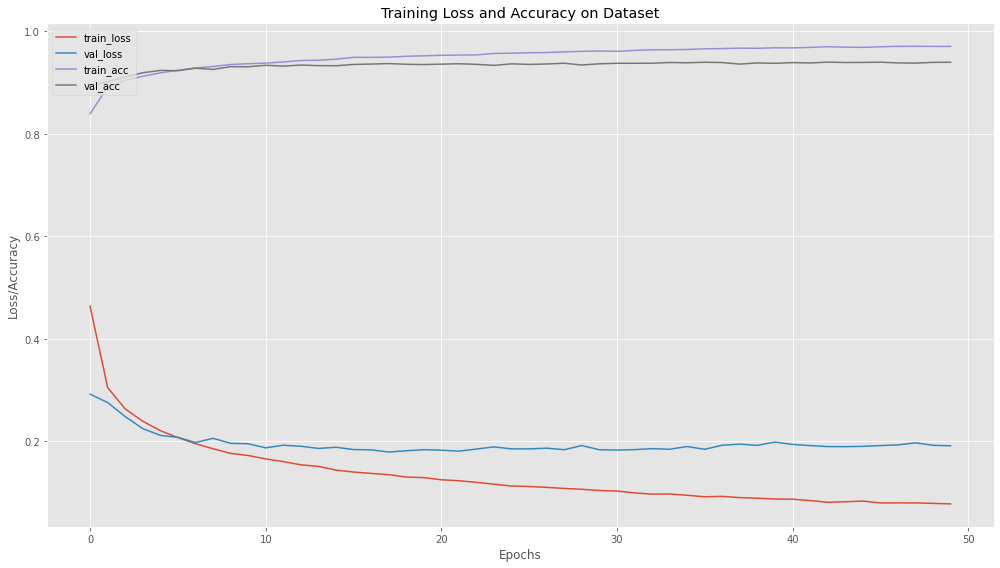

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the training loss and accuray
plt.style.use("ggplot")
plt.figure(figsize=(14,8))
plt.plot(np.arange(0, NUM_EPOCHS), history.history['loss'], label='train_loss')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# # plt.savefig("plot_perf.png")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("plot_loss_acc.png", dpi = 50)
plt.show()


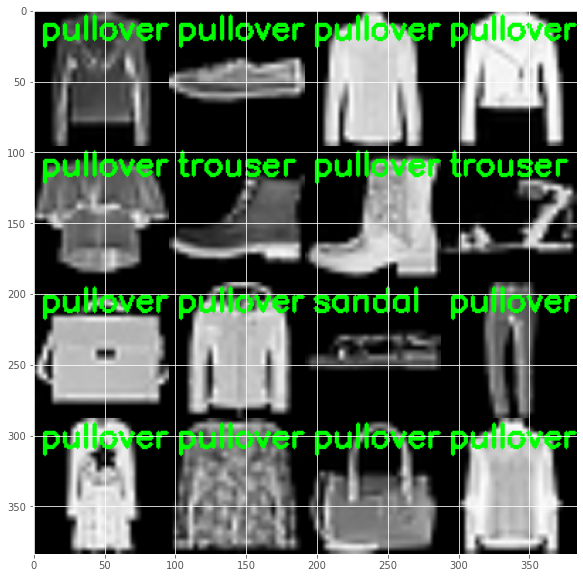

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# initialize our list of output images
images = []

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
	# classify the clothing
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = labelNames[prediction[0]]
 
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (X_test[i][0] * 255).astype("uint8")
 
	# otherwise we are using "channels_last" ordering
	else:
		image = (X_test[i] * 255).astype("uint8")

	# initialize the text label color as green (correct)
	color = (0, 255, 0)

	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(y_test[i]):
		color = (0, 0, 255)
 
	# merge the channels into one image and resize the image from
	# 28x28 to 96x96 so we can better see it and then draw the
	# predicted label on the image
	image = cv2.merge([image] * 3)
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		(0, 255, 0), 2)

	# add the image to our list of output images
	images.append(image)

# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]

# show the output montage
# cv2.imshow("Fashion MNIST", montage)
# cv2.waitKey(0)
plt.imshow(montage, cmap='gray')
plt.show()


This completes the MTH786 coding project requirements. Please do not forget to write a detailed report on your findings (at most 8 pages) with $\LaTeX$ and your favourite editor. If no editor is at hand, please feel free to use online editors such as [Overleaf](https://www.overleaf.com).